In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import linear_model 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.model_selection import  train_test_split

In [34]:
df = pd.read_csv(r"C:\Users\Thushar Mohan\OneDrive\Desktop\Python Sample Data\Regression\kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [36]:
df.drop(['id','date'], axis=1, inplace= True)


In [37]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [38]:
print(df.corr())

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.3

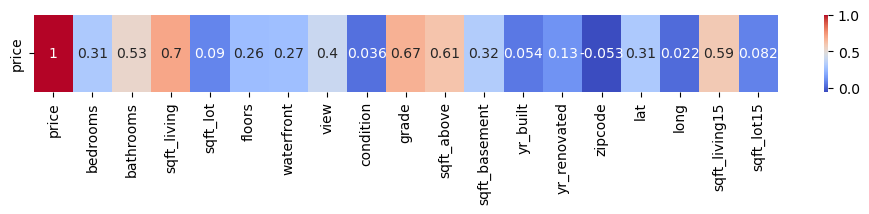

In [39]:
plt.figure(figsize=(12,1))
sns.heatmap(df.corr().loc[['price'],:], cmap='coolwarm', annot=True)
plt.show()

## From the above heatmap, we may sortout the variables who have high correlation with Price 

- bathrooms
- sqft_living
- grade
- sqft_above
- sqft_living15


C:\Users\Thushar Mohan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


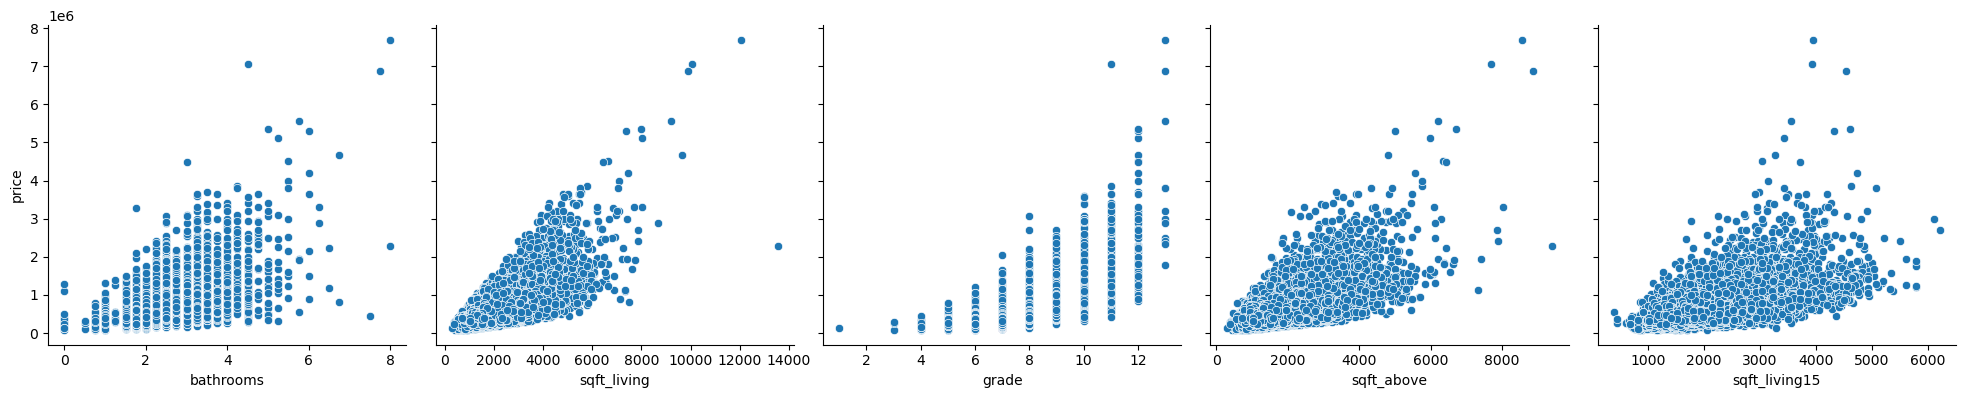

In [40]:
sns.pairplot(df, x_vars= ['bathrooms','sqft_living','grade','sqft_above', 'sqft_living15'], y_vars= ['price'],height=4, aspect=1, kind='scatter')
plt.show()

In [41]:
df1 = df[['price','bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']].copy()
df1

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800
...,...,...,...,...,...,...
21608,360000.0,2.50,1530,8,1530,1530
21609,400000.0,2.50,2310,8,2310,1830
21610,402101.0,0.75,1020,7,1020,1020
21611,400000.0,2.50,1600,8,1600,1410


## Model Building 

In [42]:
x= df1[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
x

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.00,1180,7,1180,1340
1,2.25,2570,7,2170,1690
2,1.00,770,6,770,2720
3,3.00,1960,7,1050,1360
4,2.00,1680,8,1680,1800
...,...,...,...,...,...
21608,2.50,1530,8,1530,1530
21609,2.50,2310,8,2310,1830
21610,0.75,1020,7,1020,1020
21611,2.50,1600,8,1600,1410


In [44]:
y = df1[['price']]
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


<Axes: >

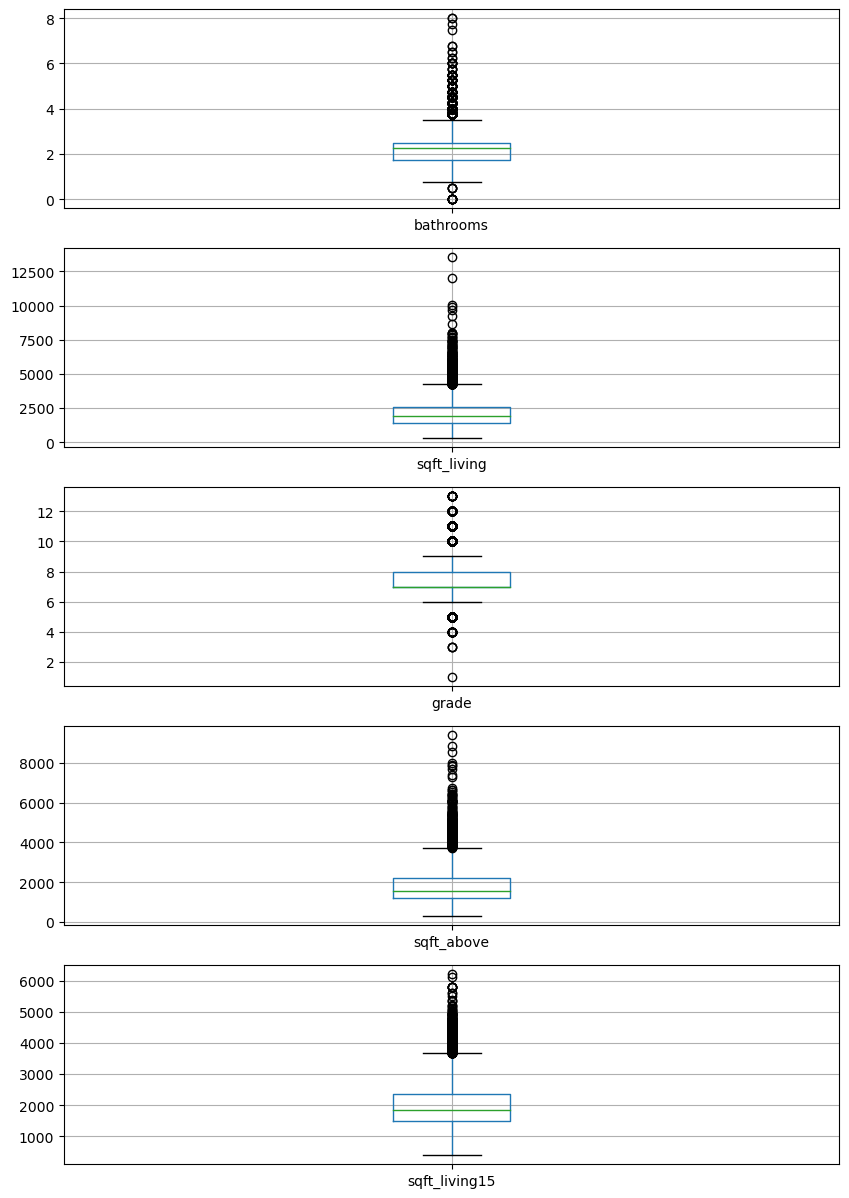

In [45]:
fig, ax = plt.subplots(5, figsize=(10,15))

df1.boxplot(['bathrooms'], ax=ax[0])
df1.boxplot(['sqft_living'], ax=ax[1])
df1.boxplot(['grade'], ax=ax[2])
df1.boxplot(['sqft_above'], ax=ax[3])
df1.boxplot(['sqft_living15'], ax=ax[4])

In [46]:
from scipy import stats 

In [53]:
# Define a function to remove outliers based on Z-score 

def remove_outliers (df1,threshold = 3):
    z_scores= stats.zscore(df1)
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < threshold). all(axis=1)
    return df1[filtered_entries]

#Remove outliers from the Dataframe 
df1= remove_outliers(df1)

df1.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19940 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19940 non-null  float64
 1   bathrooms      19940 non-null  float64
 2   sqft_living    19940 non-null  int64  
 3   grade          19940 non-null  int64  
 4   sqft_above     19940 non-null  int64  
 5   sqft_living15  19940 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.1 MB


### Exploratory Data Analysis 

C:\Users\Thushar Mohan\AppData\Local\Temp\ipykernel_16592\4271794803.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price']);


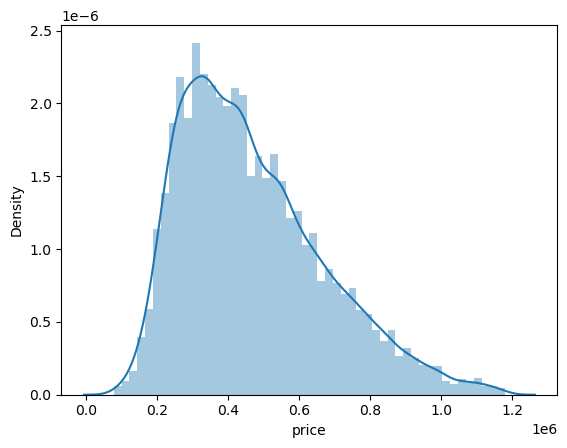

In [54]:
sns.distplot(df1['price']);

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=100)

In [61]:
y_train.shape

(15129, 1)

In [63]:
y_test.shape

(6484, 1)

In [64]:
reg_model = linear_model.LinearRegression() 

In [65]:
reg_model = LinearRegression().fit(x_train,y_train)

In [68]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(x, reg_model.coef_))

Intercept:  [-657697.55438187]


[('bathrooms',
  array([-3.31362365e+04,  2.42619400e+02,  1.13473642e+05, -8.63124114e+01,
          2.49031910e+01]))]

In [70]:
y_pred= reg_model.predict(x_test)  
x_pred= reg_model.predict(x_train) 

In [75]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [[ 495386.55573422]
 [ 335220.06840349]
 [ 697131.8230243 ]
 ...
 [ 850182.75143789]
 [ 448969.03843706]
 [1452048.90278196]]


In [76]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

ValueError: Per-column arrays must each be 1-dimensional

In [77]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 160483.0291153458
Mean Square Error: 61331974349.03966
Root Mean Square Error: 247652.93123449932
